# Training Naive Bayes without stopword cleaning

importing all necessary libraries

In [67]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle
from sklearn.metrics import *
from nltk.classify import NaiveBayesClassifier
from nltk.tokenize import word_tokenize

setting to show full text content

In [68]:
pd.set_option('display.max_colwidth', None)

## importing data and feature vector extraction

In [69]:
df_naive_bayes_with_stopwords = pd.read_csv('../../../../Data-Preparation/sentiment140/traindata_with_stopwords_preprocessed.csv')

In [70]:
df_naive_bayes_with_stopwords

,Text,target,Ground_Truth_Label
0,Rise and shining lol. I'm up a few mins later then planned but no rush i'll be out the door in time,4,positive
1,Had a 2nd interview today. It's looking promising.,4,positive
2,@EmilyAlbracht I feel your pain!,0,negative
3,http://twitpic.com/6sdbj - 4yr old son and I went exploring &amp; hiking today and this is what we found Luv amphibians!,4,positive
4,is lonely because all my housemates have gone to the pub,0,negative
...,...,...,...
1279995,Being held together by bubblegum &amp; blessings,4,positive
1279996,Heehee! I was one of them,4,positive
1279997,@bookwitter your welcome if you change your mind though let me know,4,positive
1279998,@howcoza YOU BET I WILL Bring Backup!,4,positive


In [71]:
df_naive_bayes_with_stopwords['target'].value_counts()

target
4    640000
0    640000
Name: count, dtype: int64

using one-hot encoding for words present in a sentence

In [72]:
def extract_features(text):
    words = word_tokenize(text)
    features = {word.lower(): True for word in words if word.isalpha()}
    return features



In [73]:
df_naive_bayes_with_stopwords['features'] = df_naive_bayes_with_stopwords['Text'].apply(lambda text: extract_features(str(text)))

In [74]:
df_naive_bayes_with_stopwords

,Text,target,Ground_Truth_Label,features
0,Rise and shining lol. I'm up a few mins later then planned but no rush i'll be out the door in time,4,positive,"{'rise': True, 'and': True, 'shining': True, 'lol': True, 'i': True, 'up': True, 'a': True, 'few': True, 'mins': True, 'later': True, 'then': True, 'planned': True, 'but': True, 'no': True, 'rush': True, 'be': True, 'out': True, 'the': True, 'door': True, 'in': True, 'time': True}"
1,Had a 2nd interview today. It's looking promising.,4,positive,"{'had': True, 'a': True, 'interview': True, 'today': True, 'it': True, 'looking': True, 'promising': True}"
2,@EmilyAlbracht I feel your pain!,0,negative,"{'emilyalbracht': True, 'i': True, 'feel': True, 'your': True, 'pain': True}"
3,http://twitpic.com/6sdbj - 4yr old son and I went exploring &amp; hiking today and this is what we found Luv amphibians!,4,positive,"{'http': True, 'old': True, 'son': True, 'and': True, 'i': True, 'went': True, 'exploring': True, 'amp': True, 'hiking': True, 'today': True, 'this': True, 'is': True, 'what': True, 'we': True, 'found': True, 'luv': True, 'amphibians': True}"
4,is lonely because all my housemates have gone to the pub,0,negative,"{'is': True, 'lonely': True, 'because': True, 'all': True, 'my': True, 'housemates': True, 'have': True, 'gone': True, 'to': True, 'the': True, 'pub': True}"
...,...,...,...,...
1279995,Being held together by bubblegum &amp; blessings,4,positive,"{'being': True, 'held': True, 'together': True, 'by': True, 'bubblegum': True, 'amp': True, 'blessings': True}"
1279996,Heehee! I was one of them,4,positive,"{'heehee': True, 'i': True, 'was': True, 'one': True, 'of': True, 'them': True}"
1279997,@bookwitter your welcome if you change your mind though let me know,4,positive,"{'bookwitter': True, 'your': True, 'welcome': True, 'if': True, 'you': True, 'change': True, 'mind': True, 'though': True, 'let': True, 'me': True, 'know': True}"
1279998,@howcoza YOU BET I WILL Bring Backup!,4,positive,"{'howcoza': True, 'you': True, 'bet': True, 'i': True, 'will': True, 'bring': True, 'backup': True}"


## Training of the classifier

Bernoulli Naive Bayes

Based on the presence of a word rather than its frequency.

The frequency of a word is important only across all tweets and not within an individual tweet. For example, in a single tweet, whether "good" appears once or twice does not matter; only its presence is significant.

In the classifier used here, the absence of a feature (word) is already accounted for by counting the number of missing values (None) and incorporating this into the probability distribution. This correctly handles the absence of a word, and a feature vector (dictionary) with True values for present words is sufficient.

the data that's used to train the vector gets created by zipping the feature and the label together

In [75]:
data = list(zip(df_naive_bayes_with_stopwords['features'], df_naive_bayes_with_stopwords['Ground_Truth_Label']))

In [76]:
print(data[0])

({'rise': True, 'and': True, 'shining': True, 'lol': True, 'i': True, 'up': True, 'a': True, 'few': True, 'mins': True, 'later': True, 'then': True, 'planned': True, 'but': True, 'no': True, 'rush': True, 'be': True, 'out': True, 'the': True, 'door': True, 'in': True, 'time': True}, 'positive')


In [77]:
classifier = NaiveBayesClassifier.train(data)

the prediction of the classifier gets added to the dataframe as a column

In [78]:
df_naive_bayes_with_stopwords['Prediction'] = df_naive_bayes_with_stopwords['features'].apply(classifier.classify)

In [79]:
df_naive_bayes_with_stopwords.head()

,Text,target,Ground_Truth_Label,features,Prediction
0,Rise and shining lol. I'm up a few mins later then planned but no rush i'll be out the door in time,4,positive,"{'rise': True, 'and': True, 'shining': True, 'lol': True, 'i': True, 'up': True, 'a': True, 'few': True, 'mins': True, 'later': True, 'then': True, 'planned': True, 'but': True, 'no': True, 'rush': True, 'be': True, 'out': True, 'the': True, 'door': True, 'in': True, 'time': True}",negative
1,Had a 2nd interview today. It's looking promising.,4,positive,"{'had': True, 'a': True, 'interview': True, 'today': True, 'it': True, 'looking': True, 'promising': True}",positive
2,@EmilyAlbracht I feel your pain!,0,negative,"{'emilyalbracht': True, 'i': True, 'feel': True, 'your': True, 'pain': True}",negative
3,http://twitpic.com/6sdbj - 4yr old son and I went exploring &amp; hiking today and this is what we found Luv amphibians!,4,positive,"{'http': True, 'old': True, 'son': True, 'and': True, 'i': True, 'went': True, 'exploring': True, 'amp': True, 'hiking': True, 'today': True, 'this': True, 'is': True, 'what': True, 'we': True, 'found': True, 'luv': True, 'amphibians': True}",positive
4,is lonely because all my housemates have gone to the pub,0,negative,"{'is': True, 'lonely': True, 'because': True, 'all': True, 'my': True, 'housemates': True, 'have': True, 'gone': True, 'to': True, 'the': True, 'pub': True}",negative


showing words with biggest influence on the prediction

In [80]:
classifier.show_most_informative_features(10)

Most Informative Features
                    sadd = True           negati : positi =     55.0 : 1.0
                  ouchie = True           negati : positi =     54.3 : 1.0
                  farrah = True           negati : positi =     44.8 : 1.0
                 sadface = True           negati : positi =     44.2 : 1.0
             shareholder = True           positi : negati =     42.3 : 1.0
                saddened = True           negati : positi =     39.0 : 1.0
                  triste = True           negati : positi =     36.3 : 1.0
                 unloved = True           negati : positi =     36.2 : 1.0
                 saddens = True           negati : positi =     32.6 : 1.0
                fuzzball = True           positi : negati =     31.8 : 1.0


## Testing quality of the classifier on training data

calculating metrics to quanitfy the quality of the model

In [86]:
accuracy = accuracy_score(df_naive_bayes_with_stopwords['Ground_Truth_Label'], df_naive_bayes_with_stopwords['Prediction'])
precision = precision_score(df_naive_bayes_with_stopwords['Ground_Truth_Label'], df_naive_bayes_with_stopwords['Prediction'], pos_label='positive')
recall = recall_score(df_naive_bayes_with_stopwords['Ground_Truth_Label'], df_naive_bayes_with_stopwords['Prediction'], pos_label='positive')
f1 = f1_score(df_naive_bayes_with_stopwords['Ground_Truth_Label'], df_naive_bayes_with_stopwords['Prediction'], pos_label='positive')

beta = 1 / (2**0.5)
f_beta = fbeta_score(df_naive_bayes_with_stopwords['Ground_Truth_Label'], df_naive_bayes_with_stopwords['Prediction'], beta=beta, pos_label='positive')

In [87]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"F-beta Score (beta={beta}): {f_beta}")

Accuracy: 0.82
Precision: 0.90
Recall: 0.72
F1 Score: 0.80
F-beta Score (beta=0.7071067811865475): 0.8319689408543066


In [83]:
print("\nClassification Report:\n")
print(classification_report(df_naive_bayes_with_stopwords['Ground_Truth_Label'], df_naive_bayes_with_stopwords['Prediction'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.77      0.92      0.84    640000
    positive       0.90      0.72      0.80    640000

    accuracy                           0.82   1280000
   macro avg       0.83      0.82      0.82   1280000
weighted avg       0.83      0.82      0.82   1280000



creating heatmap to visualize false positives and false negatives

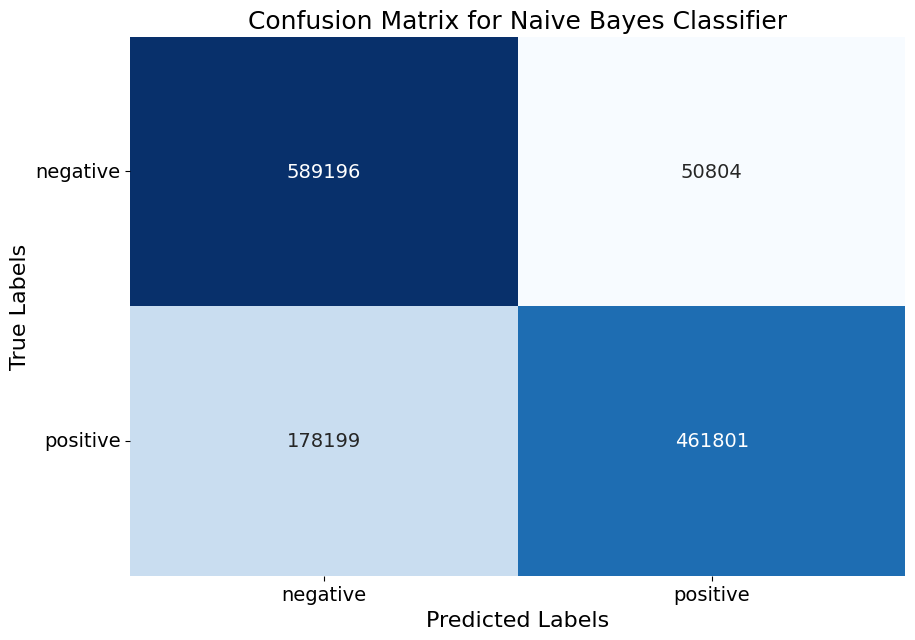

In [84]:
cm_nb = confusion_matrix(df_naive_bayes_with_stopwords['Ground_Truth_Label'], df_naive_bayes_with_stopwords['Prediction'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for Naive Bayes Classifier', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()

## Exporting classifier

In [85]:
with open('naive_bayes_with_stopwords_classifier.pkl', 'wb') as file:
    pickle.dump(classifier, file)